### Context
**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. A company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Acknowledgement**

The dataset for this project is provided by Dr. Omar Romero-Hernandez.

### 1. Import Libraries and Data

In [88]:
# import neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # line, bar, scatter, histogram, ...
import seaborn as sns #boxplot, heatmap, ...

# display setup 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

In [2]:
# import data
df = pd.read_csv('/workspaces/adorie-data-projects/customer-personality-analysis/data/raw/marketing_campaign.csv',
                delimiter = "\t")

### 2. Basic Information about the Dataset

In [89]:
df.shape

(4, 37)

In [90]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [91]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_year,Dt_month,Dt_day,Children,IsParent,MntTotal,Age,log_MntWines
774,4303,1957,PhD,In a relationship,6835.000,0,1,2012-12-08,76,107,2,12,2,2,12,0,0,0,1,20,0,0,0,0,0,0,3,11,0,2012,12,8,1,1,137,68,4.682
1042,10749,1991,Graduation,Single,8028.000,0,0,2012-09-18,62,73,18,66,7,12,2,15,0,1,0,19,0,0,0,0,0,0,3,11,0,2012,9,18,0,0,178,34,4.304
1328,4246,1982,Master,Single,6560.000,0,0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,17,0,0,0,0,0,0,3,11,0,2013,12,12,0,0,373,43,4.220
1806,6237,1966,PhD,Single,7144.000,0,2,2013-12-07,92,81,4,33,5,2,291,0,23,1,1,0,0,0,0,0,0,0,3,11,0,2013,12,7,2,1,416,59,4.407


In [6]:
# After looking through the dataset, we can categorize each attribute into different groups for better analysis

# Customer Info:
# ID: Customer's unique identifier
# Year_Birth: Customer's birth year
# Education: Customer's education level -- CATEGORICAL
# Marital_Status: Customer's marital status -- CATEGORICAL
# Income: Customer's yearly household income
# Kidhome: Number of children in customer's household
# Teenhome: Number of teenagers in customer's household
# Dt_Customer: Date of customer's enrollment with the company
# Recency: Number of days since customer's last purchase
# Complain: 1 if the customer complained in the last 2 years, 0 otherwise -- BOOLEAN

# Product Info:
# MntWines: Amount spent on wine in last 2 years
# MntFruits: Amount spent on fruits in last 2 years
# MntMeatProducts: Amount spent on meat in last 2 years
# MntFishProducts: Amount spent on fish in last 2 years
# MntSweetProducts: Amount spent on sweets in last 2 years
# MntGoldProds: Amount spent on gold in last 2 years

# Promotion Campaign Info
# NumDealsPurchases: Number of purchases made with a discount
# AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise -- BOOLEAN
# AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise -- BOOLEAN
# AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise -- BOOLEAN
# AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise -- BOOLEAN
# AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise -- BOOLEAN
# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise -- BOOLEAN

# Channel Info
# NumWebPurchases: Number of purchases made through the company’s website
# NumCatalogPurchases: Number of purchases made using a catalogue
# NumStorePurchases: Number of purchases made directly in stores
# NumWebVisitsMonth: Number of visits to company’s website in the last month

### 3. Data Cleaning

#### Handle duplicate values

In [9]:
# check duplicate in attribute ID
check_duplicated = df['ID'].duplicated().any()
if check_duplicated:
    print('Duplicated value found')
else:
    print('No duplicated value')

Không có dữ liệu trùng lặp


#### Handle missing values

In [10]:
# check missing value
missing_value_summary = df.isnull().sum()[df.isnull().sum() != 0]
missing_rows = df[df.isnull().any(axis=1)]

In [11]:
missing_value_summary

Income    24
dtype: int64

In [12]:
missing_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_year,Dt_month,Dt_day
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,2013,11,15
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,2013,2,20
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,2013,11,5
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,2014,1,1
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,2013,6,17
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,2012,9,14
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0,2012,11,19
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,2014,5,27
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0,2013,11,23
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0,2013,7,11


In [13]:
# when looking at rows in which income values are missing
# other attributes such as: year, education, marital status are variable
# and have nothing in common
# --> missing values in income are MCAR --> drop 
df = df.dropna(subset=['Income'])

#### Handle date-time values

In [7]:
# change data type of Dt_Customer to d - m - Y format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = "%d-%m-%Y")

In [8]:
# extract year, month, day for later analysis 
df['Dt_year'] = df['Dt_Customer'].dt.year
df['Dt_month'] = df['Dt_Customer'].dt.month
df['Dt_day'] = df['Dt_Customer'].dt.day

#### Handle Categorical values

In [15]:
# check Education attribute 
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [16]:
# Second cycle programs are provided through second cycle of academic (graduate) studies 
# and second cycle of vocational studies. 
# The second cycle of academic (graduate) study programs lasts between 1 and 2 years, 
# offers 60 to 120 credits (60 ECTS credits for one year), 
# and awards a master degree.

In [17]:
# check Marital_Status attribut
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [18]:
# There are 8 different groups, containing 2 weird ones (with small amount): Absurd, YOLO --> drop
# Put them together in  groups
# Married and Together --> In a relationship
# Single, Divorced, Widow, Alone --> Single

In [19]:
# group
df['Marital_Status'] = df['Marital_Status'].replace({
    'Together': 'In a relationship',
    'Married': 'In a relationship',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other'
})

# drop 
df = df[df['Marital_Status'] != "Other"]

In [20]:
# check again after re-group them
df['Marital_Status'].value_counts()

Marital_Status
In a relationship    1430
Single                782
Name: count, dtype: int64

#### Handle boolean values

In [21]:
# there are columns in which value is 1/0 (as yes/no) 
# need to check whether there are other values than 1 and 0

boolean_cols = ['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for col in boolean_cols:
    print(df[col].value_counts())
    print('------')

Complain
0    2191
1      21
Name: count, dtype: int64
------
AcceptedCmp1
0    2071
1     141
Name: count, dtype: int64
------
AcceptedCmp2
0    2182
1      30
Name: count, dtype: int64
------
AcceptedCmp3
0    2049
1     163
Name: count, dtype: int64
------
AcceptedCmp4
0    2048
1     164
Name: count, dtype: int64
------
AcceptedCmp5
0    2051
1     161
Name: count, dtype: int64
------


#### Add Columns

In [22]:
# add: Children = Kidhome + Teenhome
df['Children'] = df['Kidhome'] + df['Teenhome']

In [23]:
# add: IsParent: 1 for Children > 0, 0 for Children = 0
df['IsParent'] = np.where(df['Children']> 0, 1, 0)

In [24]:
# add: Mnt Total = sum of all Mnt
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [25]:
# add: Age
df['Age'] = 2025 - df['Year_Birth']

### 4. Distribution Analysis

In [27]:
# create function to draw bar chart to count frequency
def frequency(col, figsize = (5,2)):
    vc = df[col].value_counts()
    plt.figure(figsize=figsize)
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f'Bar Chart of {col}')
    plt.ylabel(col)
    plt.show()

In [28]:
# create function to draw pie chart
def pie_chart(col, figsize=(3,3)):
    vc = df[col].value_counts()
    plt.figure(figsize=figsize)
    
    # draw pie
    plt.pie(vc.values, startangle=90, colors=sns.color_palette('pastel')[0:len(vc)])
    
    # legend 
    total = vc.sum()
    legend_labels = [f"{idx} ({value/total:.1%})" for idx, value in zip(vc.index, vc.values)]
    plt.legend(legend_labels, title="Categories", 
               bbox_to_anchor=(1.05, 0.5), loc="center left", fontsize=9)
    
    plt.title(f'Pie Chart of {col}')
    plt.show()

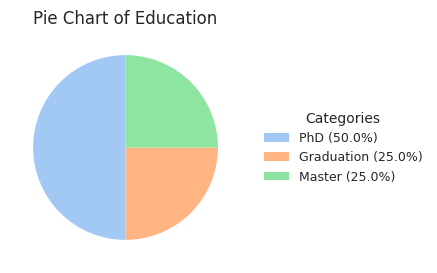

In [92]:
pie_chart('Education')

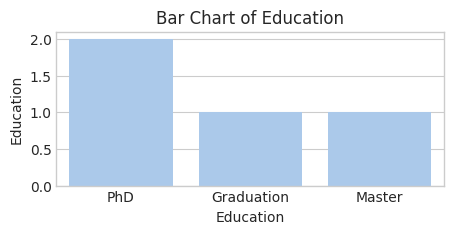

In [93]:
frequency('Education')

In [ ]:
# --> 1/2 of customers have PhD degree
# --> 1/4 of customers have graduate
# --> 1/4 

In [31]:
# Tạo hàm đếm frequency cho biến boolean
def boolean_frequency(col, figsize=(5,2)):
    data = df[col].copy()
    data = data.replace({1: 'Yes', 0: 'No'})
                        
    vc = data.value_counts()
    plt.figure(figsize=figsize)
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.show()

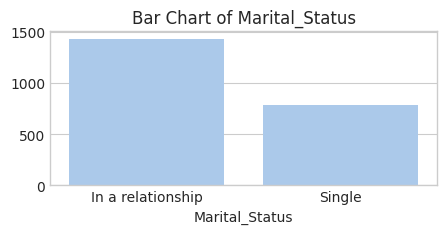

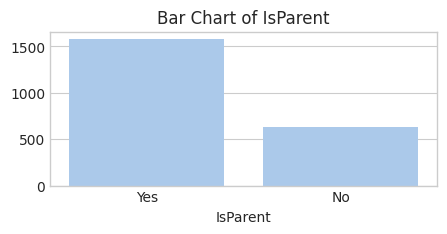

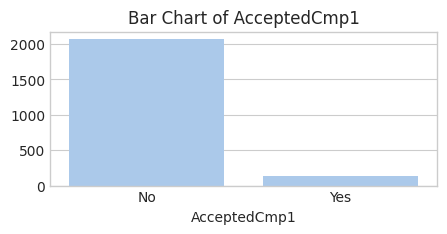

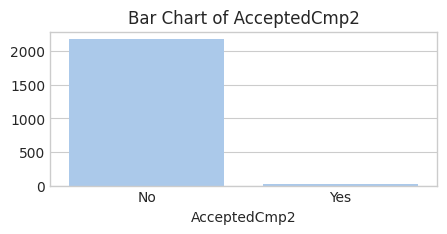

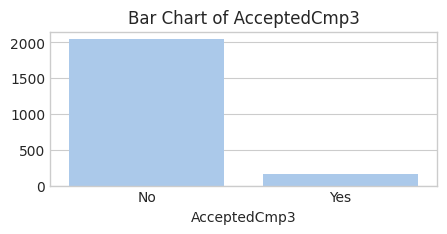

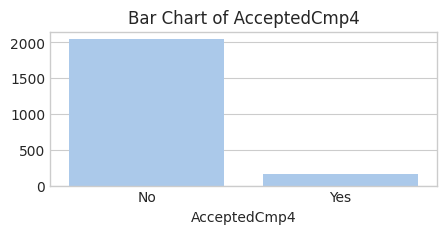

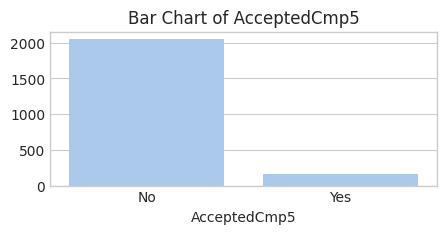

In [32]:
boolean_var = ['Marital_Status', 'IsParent', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for var in boolean_var:
    boolean_frequency(var)

In [33]:
# Tạo hàm vẽ boxplot 
def box_plot(col, figsize=(5,3)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=df[col], color='skyblue', width=0.5)
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

In [34]:
numeric_col = ['Recency', 'Income', 'MntTotal', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [80]:
def outlier_detect(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percent = len(outliers) / len(df) * 100

    print(f"Column: {col}")
    box_plot(col, figsize=(5,3))
    print(f"Total outliers: {len(outliers)} ({outlier_percent:.2f}%)")
    print(f"Range: min={df[col].min():.2f}, Q1={Q1:.2f}, median={df[col].median():.2f}, Q3={Q3:.2f}, max={df[col].max():.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    

    if len(outliers) > 0:
        print(f"Some outlier values: {outliers[col].sort_values().head(3).tolist()} ... {outliers[col].sort_values().tail(3).tolist()}")

    if len(outliers) == 0:
        print('→ No outlier')
    elif outlier_percent < 2:
        print('→ Suggestion: Drop these outliers.')
    elif outlier_percent < 10:
        print('→ Suggestion: Consider capping or transforming (log).')
    else:
        print('→ Suggestion: Check if these values are genuine, maybe keep them.')

    print('-----------------------------------------------------------------------')


Column: Recency


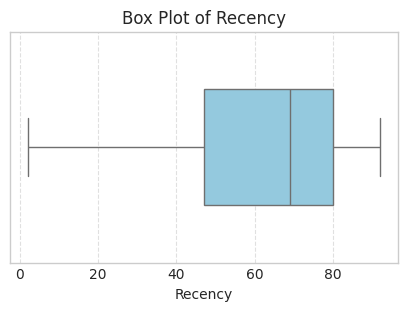

Total outliers: 0 (0.00%)
Range: min=2.00, Q1=47.00, median=69.00, Q3=80.00, max=92.00
IQR: 33.00
Lower bound: -2.50, Upper bound: 129.50
→ No outlier
-----------------------------------------------------------------------


In [81]:
# Recency
outlier_detect('Recency')

Column: Income


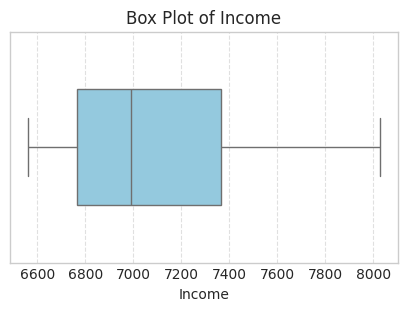

Total outliers: 0 (0.00%)
Range: min=6560.00, Q1=6766.25, median=6989.50, Q3=7365.00, max=8028.00
IQR: 598.75
Lower bound: 5868.12, Upper bound: 8263.12
→ No outlier
-----------------------------------------------------------------------


In [82]:
# Income
outlier_detect('Income')

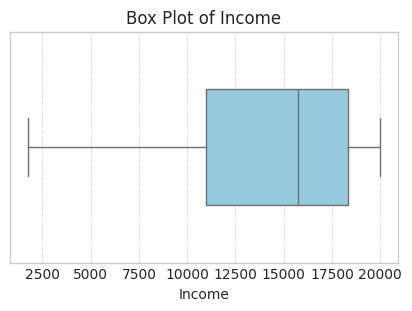

In [59]:
# có giá trị outlier trong cột income (income rất cao), nhưng số lượng ít 
# drop outlier trong cột Income và vẽ lại Box Plot 
df = df[df['Income'] < 20000]
box_plot('Income', figsize=(5,3))

In [ ]:
# Income có phân phối lệch phải --> phần lớn có thu nhập cao hơn mức trung bình
# Khoảng thu nhập chủ yếu nằm trong 10,000 - 20,000

Column: MntWines


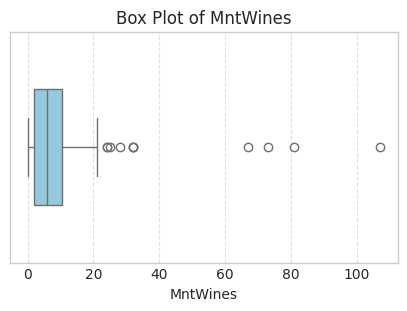

Total outliers: 11 (8.66%)
Range: min=0.00, Q1=2.00, median=6.00, Q3=10.50, max=107.00
IQR: 8.50
Lower bound: -10.75, Upper bound: 23.25
Some outlier values: [24, 24, 25] ... [73, 81, 107]
→ Suggestion: Consider capping or transforming (log).
-----------------------------------------------------------------------


In [60]:
# MntWines
outlier_detect('MntWines')

Column: log_MntWines


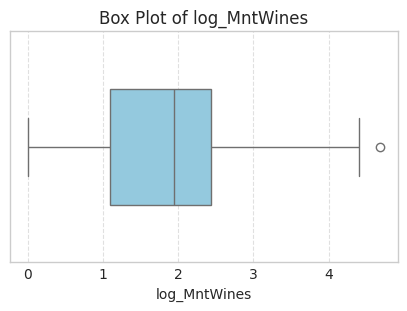

Total outliers: 1 (0.79%)
Range: min=0.00, Q1=1.10, median=1.95, Q3=2.44, max=4.68
IQR: 1.34
Lower bound: -0.92, Upper bound: 4.46
Some outlier values: [4.68213122712422] ... [4.68213122712422]
→ Suggestion: Drop these outliers.
-----------------------------------------------------------------------


In [61]:
# có giá trị outlier trong cột MntWines (một số người dùng tiêu nhiều tiền cho rượu)
# Tranform log
df['log_MntWines'] = np.log1p(df['MntWines'])
outlier_detect('log_MntWines')

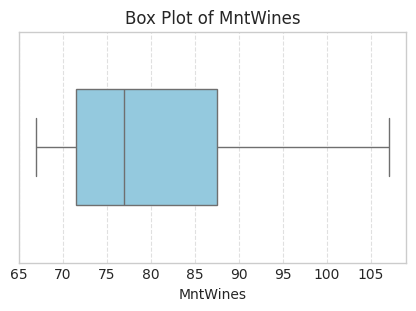

In [64]:
df = df[df['log_MntWines'] > 4]
box_plot('MntWines', figsize=(5,3))

In [ ]:
# MntWines phân phối lệch trái --> số tiền tiêu cho rượu phần lớn ít hơn giá trị trung bình
# Số tiền chi cho rượu chủ yếu nằm trong khoảng 70 - 90

Column: MntFruits


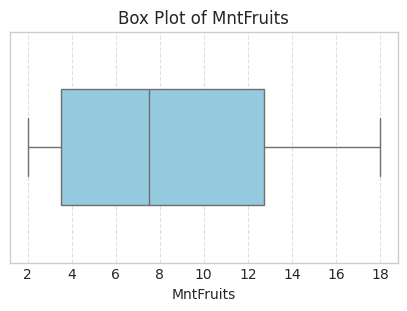

Total outliers: 0 (0.00%)
Range: min=2.00, Q1=3.50, median=7.50, Q3=12.75, max=18.00
IQR: 9.25
Lower bound: -10.38, Upper bound: 26.62
→ Suggestion: Drop these outliers.
-----------------------------------------------------------------------


In [65]:
# MntFruits
outlier_detect('MntFruits')

In [ ]:
# Không có outlier trong cột MntFruits
# Phân phối lệch trái --> phần lớn chi tiêu cho hoa quả ít hơn giá trị trung bình
# Số tiền chi cho hoa quả chủ yếu nằm trong khoảng 4 - 12

Column: MntMeatProducts


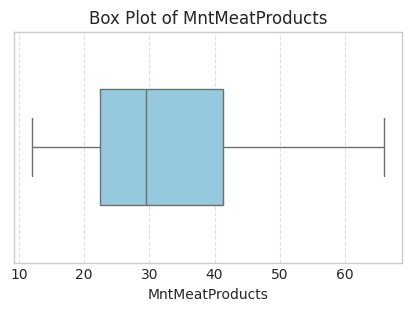

Total outliers: 0 (0.00%)
Range: min=12.00, Q1=22.50, median=29.50, Q3=41.25, max=66.00
IQR: 18.75
Lower bound: -5.62, Upper bound: 69.38
→ Suggestion: Drop these outliers.
-----------------------------------------------------------------------


In [66]:
outlier_detect('MntMeatProducts')

In [ ]:
# Không có outliner trong cột MntMeatProducts
# Phân phối lệch trái --> phần lớn chi tiêu cho sản phẩm từ thịt ít hơn mức trung bình
# Chủ yếu chi tiêu cho sản phẩm từ thịt khoảng 20 - 45

Column: MntFishProducts


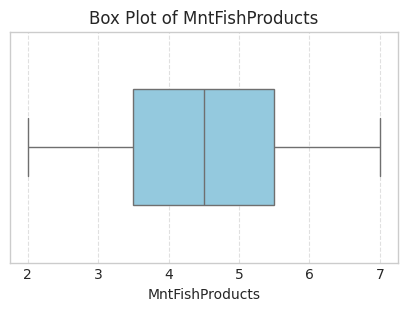

Total outliers: 0 (0.00%)
Range: min=2.00, Q1=3.50, median=4.50, Q3=5.50, max=7.00
IQR: 2.00
Lower bound: 0.50, Upper bound: 8.50
→ Suggestion: Drop these outliers.
-----------------------------------------------------------------------


In [69]:
# MntFishProducts
outlier_detect('MntFishProducts')

In [ ]:
# Không có outlier trong MntFishProducts
# Phân phối đều, không lệch
# Chủ yếu chi tiêu cho sản phẩm từ cá trong khoảng 3.5 - 5.5

Column: MntSweetProducts


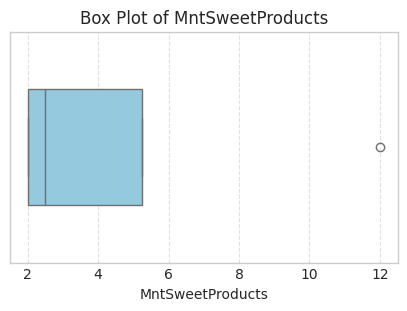

Total outliers: 1 (25.00%)
Range: min=2.00, Q1=2.00, median=2.50, Q3=5.25, max=12.00
IQR: 3.25
Lower bound: -2.88, Upper bound: 10.12
Some outlier values: [12] ... [12]
→ Suggestion: Check if these values are genuine, maybe keep them.
-----------------------------------------------------------------------


In [71]:
# MntSweetsProducts
outlier_detect('MntSweetProducts')

In [72]:
df['MntSweetProducts'].value_counts()

MntSweetProducts
2     2
12    1
3     1
Name: count, dtype: int64

In [75]:
df[df['MntSweetProducts'] != 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_year,Dt_month,Dt_day,Children,IsParent,MntTotal,Age,log_MntWines
774,4303,1957,PhD,In a relationship,6835.000,0,1,2012-12-08,76,107,2,12,2,2,12,0,0,0,1,20,0,0,0,0,0,0,3,11,0,2012,12,8,1,1,137,68,4.682
1042,10749,1991,Graduation,Single,8028.000,0,0,2012-09-18,62,73,18,66,7,12,2,15,0,1,0,19,0,0,0,0,0,0,3,11,0,2012,9,18,0,0,178,34,4.304
1328,4246,1982,Master,Single,6560.000,0,0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,17,0,0,0,0,0,0,3,11,0,2013,12,12,0,0,373,43,4.220
1806,6237,1966,PhD,Single,7144.000,0,2,2013-12-07,92,81,4,33,5,2,291,0,23,1,1,0,0,0,0,0,0,0,3,11,0,2013,12,7,2,1,416,59,4.407


In [ ]:
# Vì số lượng khách hàng mua đồ ngọt chỉ có 4 người, mẫu nhỏ, nên có thể giữ lại outlier này

Column: MntGoldProds


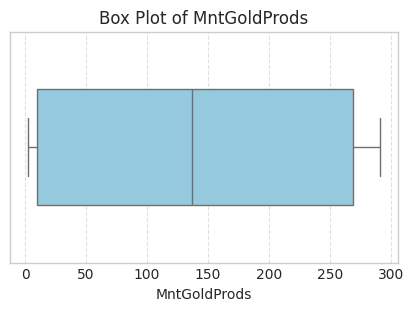

Total outliers: 0 (0.00%)
Range: min=2.00, Q1=9.50, median=137.00, Q3=269.25, max=291.00
IQR: 259.75
Lower bound: -380.12, Upper bound: 658.88
→ Suggestion: Drop these outliers.
-----------------------------------------------------------------------


In [76]:
# MntGoldProds
outlier_detect('MntGoldProds')

In [ ]:
# Không có outlier
# Phân bố đều, hơi lệch trái 
# Phần lớn chi tiêu trong khoảng 10 - 275 cho vàng

Column: MntTotal


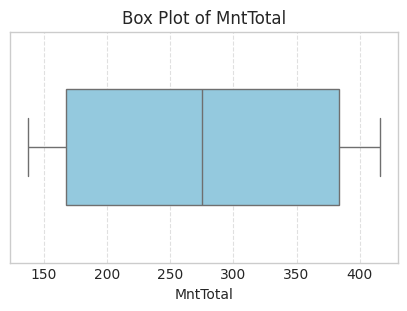

Total outliers: 0 (0.00%)
Range: min=137.00, Q1=167.75, median=275.50, Q3=383.75, max=416.00
IQR: 216.00
Lower bound: -156.25, Upper bound: 707.75
→ Suggestion: Drop these outliers.
-----------------------------------------------------------------------


In [77]:
# MntTotal
outlier_detect('MntTotal')

In [84]:
# Sau khi đã xử lí xong Outlier, xem xét tương quan của các biến
df_numeric = df[numeric_col]
corr_matrix = df_numeric.corr()
corr_matrix

,Recency,Income,MntTotal,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Recency,1.000,0.408,-0.218,0.587,-0.434,0.054,0.041,-0.028,-0.247
Income,0.408,1.000,-0.378,-0.205,0.644,0.908,0.823,0.892,-0.515
MntTotal,-0.218,-0.378,1.000,-0.570,-0.137,-0.104,0.143,-0.436,0.988
MntWines,0.587,-0.205,-0.570,1.000,-0.731,-0.592,-0.709,-0.409,-0.477
MntFruits,-0.434,0.644,-0.137,-0.731,1.000,0.863,0.803,0.894,-0.251
MntMeatProducts,0.054,0.908,-0.104,-0.592,0.863,1.000,0.969,0.927,-0.254
MntFishProducts,0.041,0.823,0.143,-0.709,0.803,0.969,1.000,0.808,-0.011
MntSweetProducts,-0.028,0.892,-0.436,-0.409,0.894,0.927,0.808,1.000,-0.562
MntGoldProds,-0.247,-0.515,0.988,-0.477,-0.251,-0.254,-0.011,-0.562,1.000


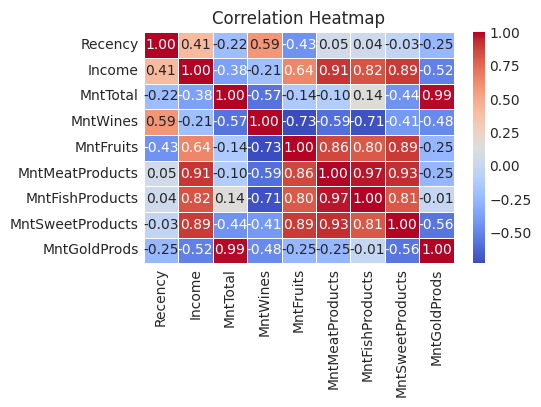

In [87]:
# vẽ heatmap
plt.figure(figsize=(5,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts có tương quan rất cao với nhau (0.8–0.97)
# --> mọi người thường mua nhiều ĐỒNG THỜI ở các loại hàng này 

# Income có tương quan cao với nhiều biến MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts
# --> thu nhập cao thì mua nhiều hàng hơn

# Recency có tương quan thấp với nhiều biến --> mua hàng gần đây
# Recency có tương quan tương đối với Income và MntWines: 0.408 với Income và 0.587 với MntWines, 
# --> người có thu nhập cao hoặc mua rượu nhiều mua cách đây lâu hơn so với người mua nhiều hoa quả, thịt, cá, ...